In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\DASOL\Desktop\bikesharing.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df = df.drop(['instant','dteday'], axis=1)

In [10]:
# 시계열 train 70%,test 30% set 나눔
train, test= np.split(df, [int(.70 *len(df))])

print(train.shape)
print(test.shape)

(12165, 15)
(5214, 15)


In [11]:
X_test = test.drop(['casual','registered','cnt'], axis=1, inplace=False)
y_test = test['cnt']

In [12]:
Xtrain = train.drop(['casual','registered','cnt'], axis=1, inplace=False)
ytrain = train['cnt']

#  시계열 train 70%,val 30% set 나눔
X_train, X_val = np.split(Xtrain, [int(.70 *len(Xtrain))])
y_train, y_val = np.split(ytrain, [int(.70 *len(ytrain))])

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(8515, 12)
(3650, 12)
(8515,)
(3650,)


<AxesSubplot:xlabel='hr', ylabel='cnt'>

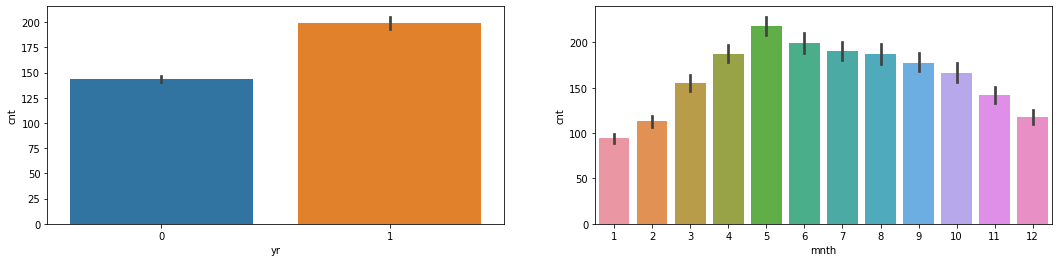

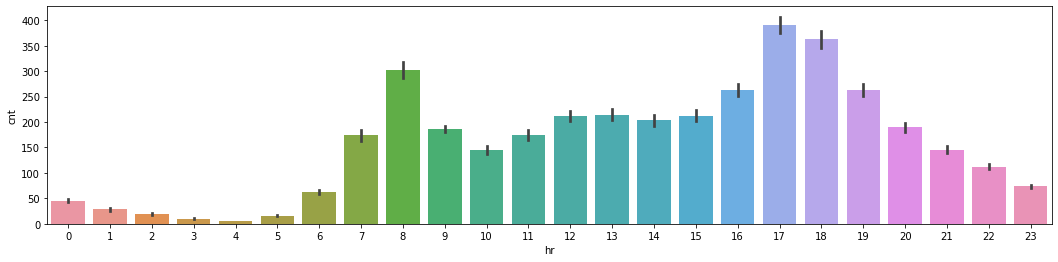

In [13]:
# rental count by time
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="yr", y="cnt", ax=ax1)
sns.barplot(data=train, x="mnth", y="cnt", ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="hr", y="cnt", ax=ax3)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

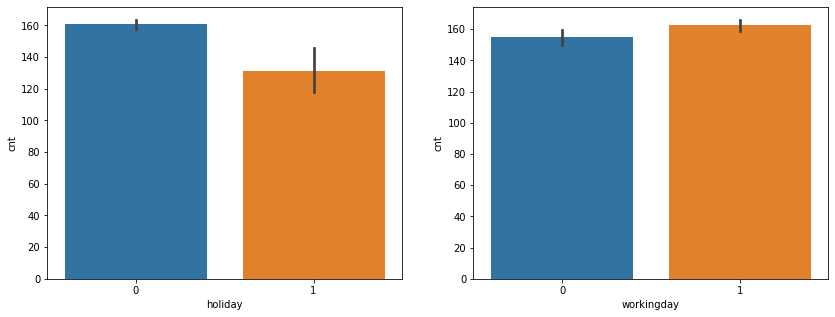

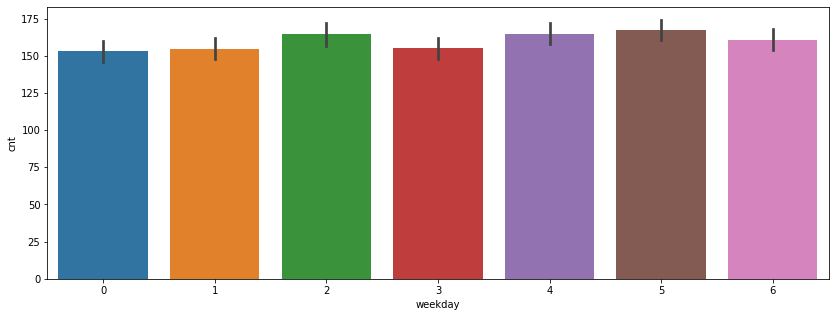

In [14]:
# rental count by time
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(14, 5)

sns.barplot(data=train, x="holiday", y="cnt", ax=ax1)
sns.barplot(data=train, x="workingday", y="cnt", ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(14, 5)

sns.barplot(data=train, x="weekday", y="cnt", ax=ax3)

<ipython-input-15-6ccf9446a573>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-15-6ccf9446a573>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


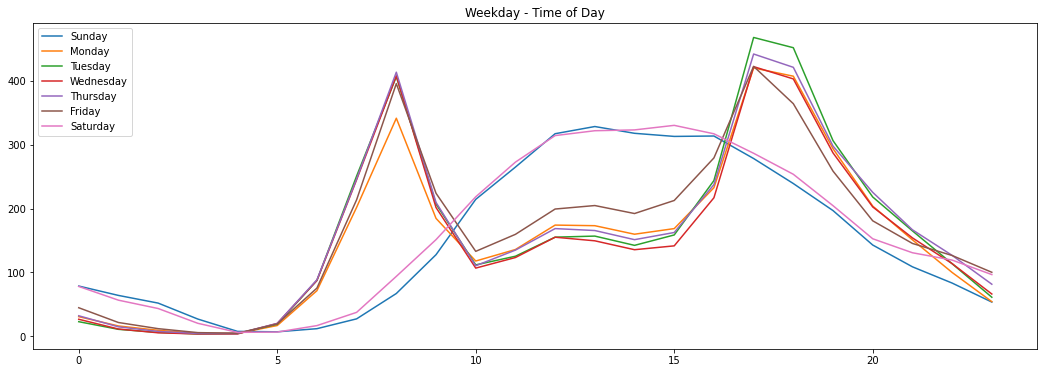

In [15]:
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)
fig.set_size_inches(18, 6)

ax.set_title('Weekday - Time of Day')

days = {0: 'Sunday', 1:'Monday', 2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}

for day in range(7): 
    datetimeGroup = train[train['weekday'] == day].groupby(['hr']).mean().reset_index()
    ax.plot(datetimeGroup.hr,datetimeGroup.cnt, label = days[day])

ax.legend(loc=2)
fig.show()

<ipython-input-16-59e4c1b5dd98>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-16-59e4c1b5dd98>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


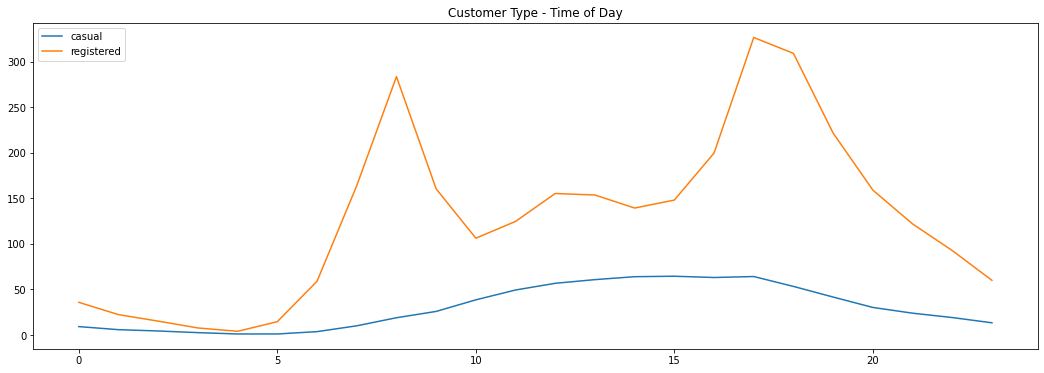

In [16]:
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)
fig.set_size_inches(18, 6)

ax.set_title('Customer Type - Time of Day')

customers = {0: 'casual', 1:'registered'}

for customer in range(len(customers)): 
    datetimeGroup = train.groupby(['hr']).mean().reset_index() 
    ax.plot(datetimeGroup.hr,datetimeGroup[customers[customer]], label = customers[customer])

ax.legend(loc=2)
fig.show()

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

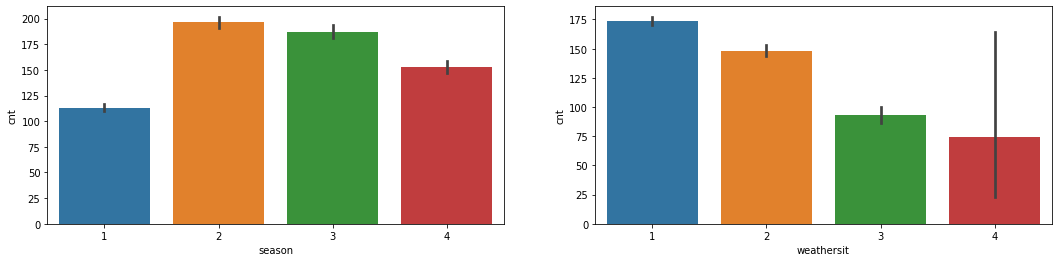

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="season", y="cnt", ax=ax1)
sns.barplot(data=train, x="weathersit", y="cnt", ax=ax2)

<AxesSubplot:xlabel='hum', ylabel='cnt'>

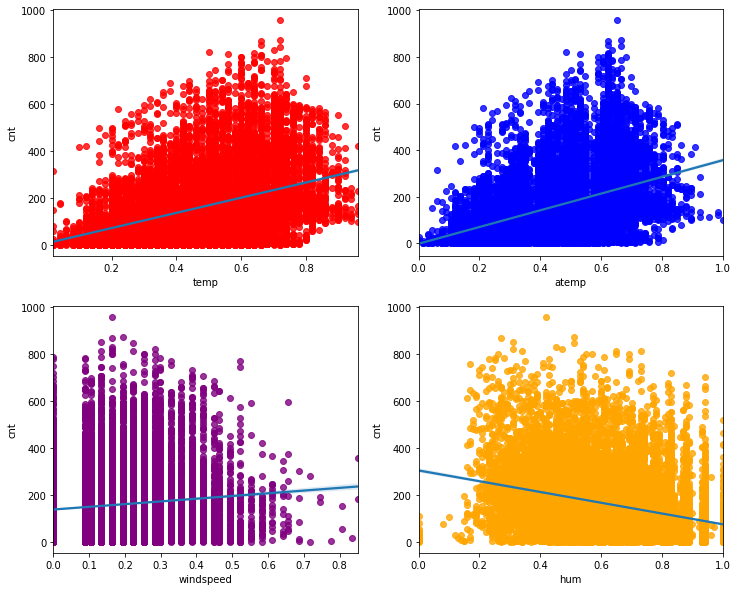

In [18]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)

sns.regplot(x="temp", y="cnt", data=train,ax=ax1, scatter_kws={'color': 'red'})
sns.regplot(x="atemp", y="cnt", data=train,ax=ax2, scatter_kws={'color': 'blue'})
sns.regplot(x="windspeed", y="cnt", data=train,ax=ax3, scatter_kws={'color': 'purple'})
sns.regplot(x="hum", y="cnt", data=train,ax=ax4, scatter_kws={'color': 'orange'})

In [19]:
# 기준모델(baseline model)
train['cnt'].mean()

159.9336621454994

In [20]:
predict = y_train.mean()
print(predict)

144.5464474456841


In [21]:
# 기준모델로 훈련 에러(MAE) 계산
from sklearn.metrics import mean_absolute_error
y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)

print(f'훈련 에러: {mae:.2f}')

훈련 에러: 107.11


In [22]:
# 테스트 에러(MAE)
y_test = test['cnt']
y_pred = [predict] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 185.08


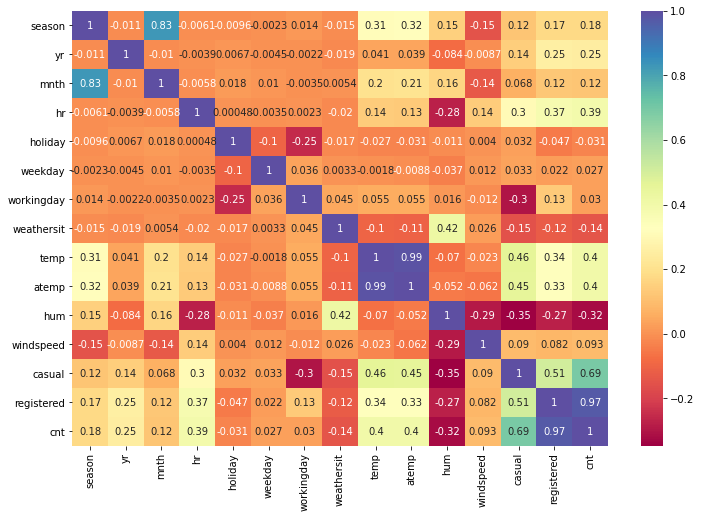

In [23]:
# pearson
corrMatrix = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corrMatrix,square = False,annot =True,cmap='Spectral', ax=ax)

plt.show()

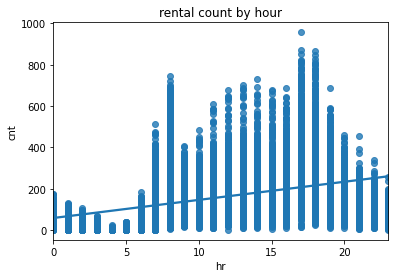

In [24]:
sns.regplot(x=train['hr'], y=train['cnt']).set_title('rental count by hour');

In [25]:
# 단순회귀모델
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

print("train set score:{:.2f}".format(reg.score(X_train, y_train)))
print("test set score:{:.2f}".format(reg.score(X_test, y_test)))

train set score:0.38
test set score:0.15


In [26]:
print("lr.coef_:", reg.coef_)
print("lr.intercept_", reg.intercept_)

lr.coef_: [ 1.38274494e+01  2.75335310e-14  1.50626486e+00  6.05129541e+00
 -1.63037555e+01 -7.29968775e-02 -2.98505007e+00 -2.86927674e+00
  1.28402108e+02  1.25490796e+02 -1.47110430e+02  2.46369786e+01]
lr.intercept_ 4.275977370587384


In [27]:
from sklearn import metrics
print("R^2 : "  ,metrics.r2_score(y_test,y_pred))
print("MSE  :"  ,metrics.mean_squared_error(y_test,y_pred))
print("MAE : "  ,metrics.mean_absolute_error(y_test,y_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R^2 :  -0.26671990001090107
MSE  : 61518.91723985575
MAE :  185.08095706914918
RMSE :  248.03007325696566


In [28]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)
print(tscv)
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)
for train, test in tscv.split(X):
    print("%s %s" % (train, test))

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)


NameError: name 'X' is not defined

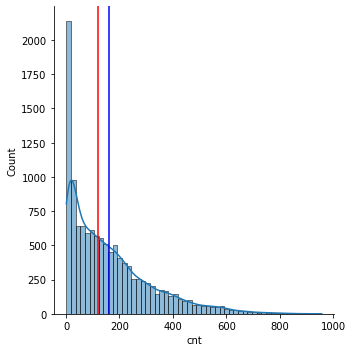

In [29]:
sns.displot(train['cnt'], kde=True)

plt.axvline(train['cnt'].mean(), color='blue')
plt.axvline(train['cnt'].median(), color='red');

In [30]:
# trainWithoutOutliers
trainWithoutOutliers = train[np.abs(train["cnt"] - train["cnt"].mean()) <= (3*train["cnt"].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

(12165, 15)
(12012, 15)


C:\Users\DASOL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DASOL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.85568548, -3.63301565, -3.51088169, ...,  3.51088169,
          3.63301565,  3.85568548]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.42486902, 6.42648846,
         6.42648846])),
 (1.336330567594488, 4.3898706484473555, 0.9602733784093929))

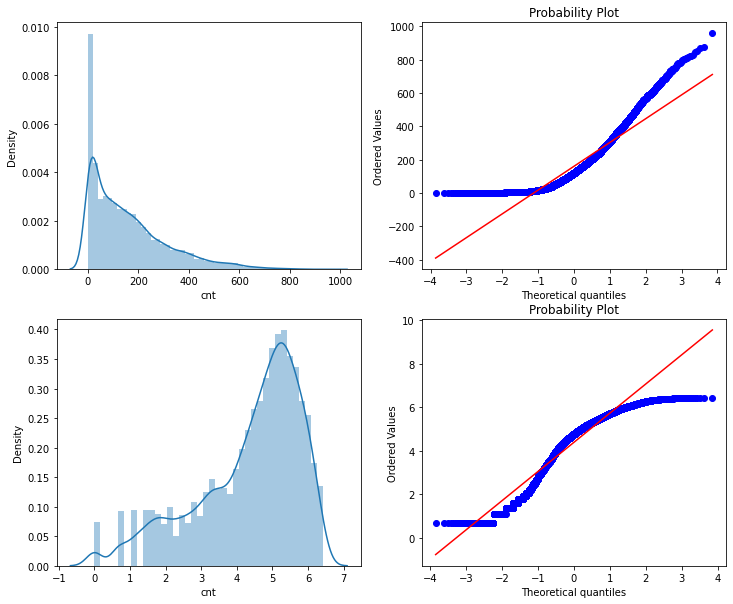

In [31]:
# count 값의 데이터 분포도를 파악
from scipy import stats

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(train["cnt"], ax=axes[0][0])
stats.probplot(train["cnt"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["cnt"]), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["cnt"]), dist='norm', fit=True, plot=axes[1][1])

LR: 0.253543 (0.041471)
KNN: 0.760014 (0.102384)
RF: 0.816787 (0.080115)


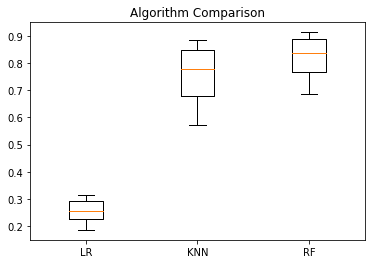

In [32]:
from sklearn.model_selection import TimeSeriesSplit

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees


# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=10)

    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


In [41]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)

    # 평균을 낸다.
    mean_difference = difference.mean()

    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)

    return score

rmsle_score = make_scorer(rmsle)
rmsle_score

make_scorer(rmsle)

In [39]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle)

RMLSE for the data: 0.8717965585372942


In [34]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmsle_score)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [48]:
best_score

0.9356311010319157

In [49]:
best_model

RandomForestRegressor(max_depth=5, max_features='sqrt')

In [50]:
rf_model = RandomForestRegressor(max_depth=5, max_features='sqrt')

In [35]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
# Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [36]:
y_true = y_test.values
y_pred = best_model.predict(X_test)

regression_results(y_true, y_pred)

explained_variance:  0.4448
mean_squared_log_error:  0.76
r2:  0.2815
MAE:  121.6683
MSE:  34892.3971
RMSE:  186.7951


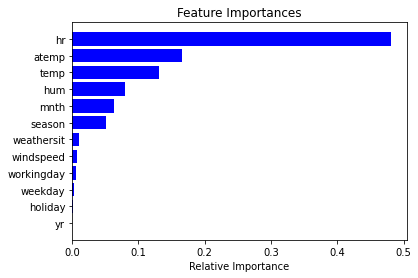

In [37]:
imp = best_model.feature_importances_
features = train.columns
indices = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [45]:
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 144 # dpi(dots per inch) 수치를 조정해 이미지 화질을 조정
from pdpbox.pdp import pdp_isolate, pdp_plot

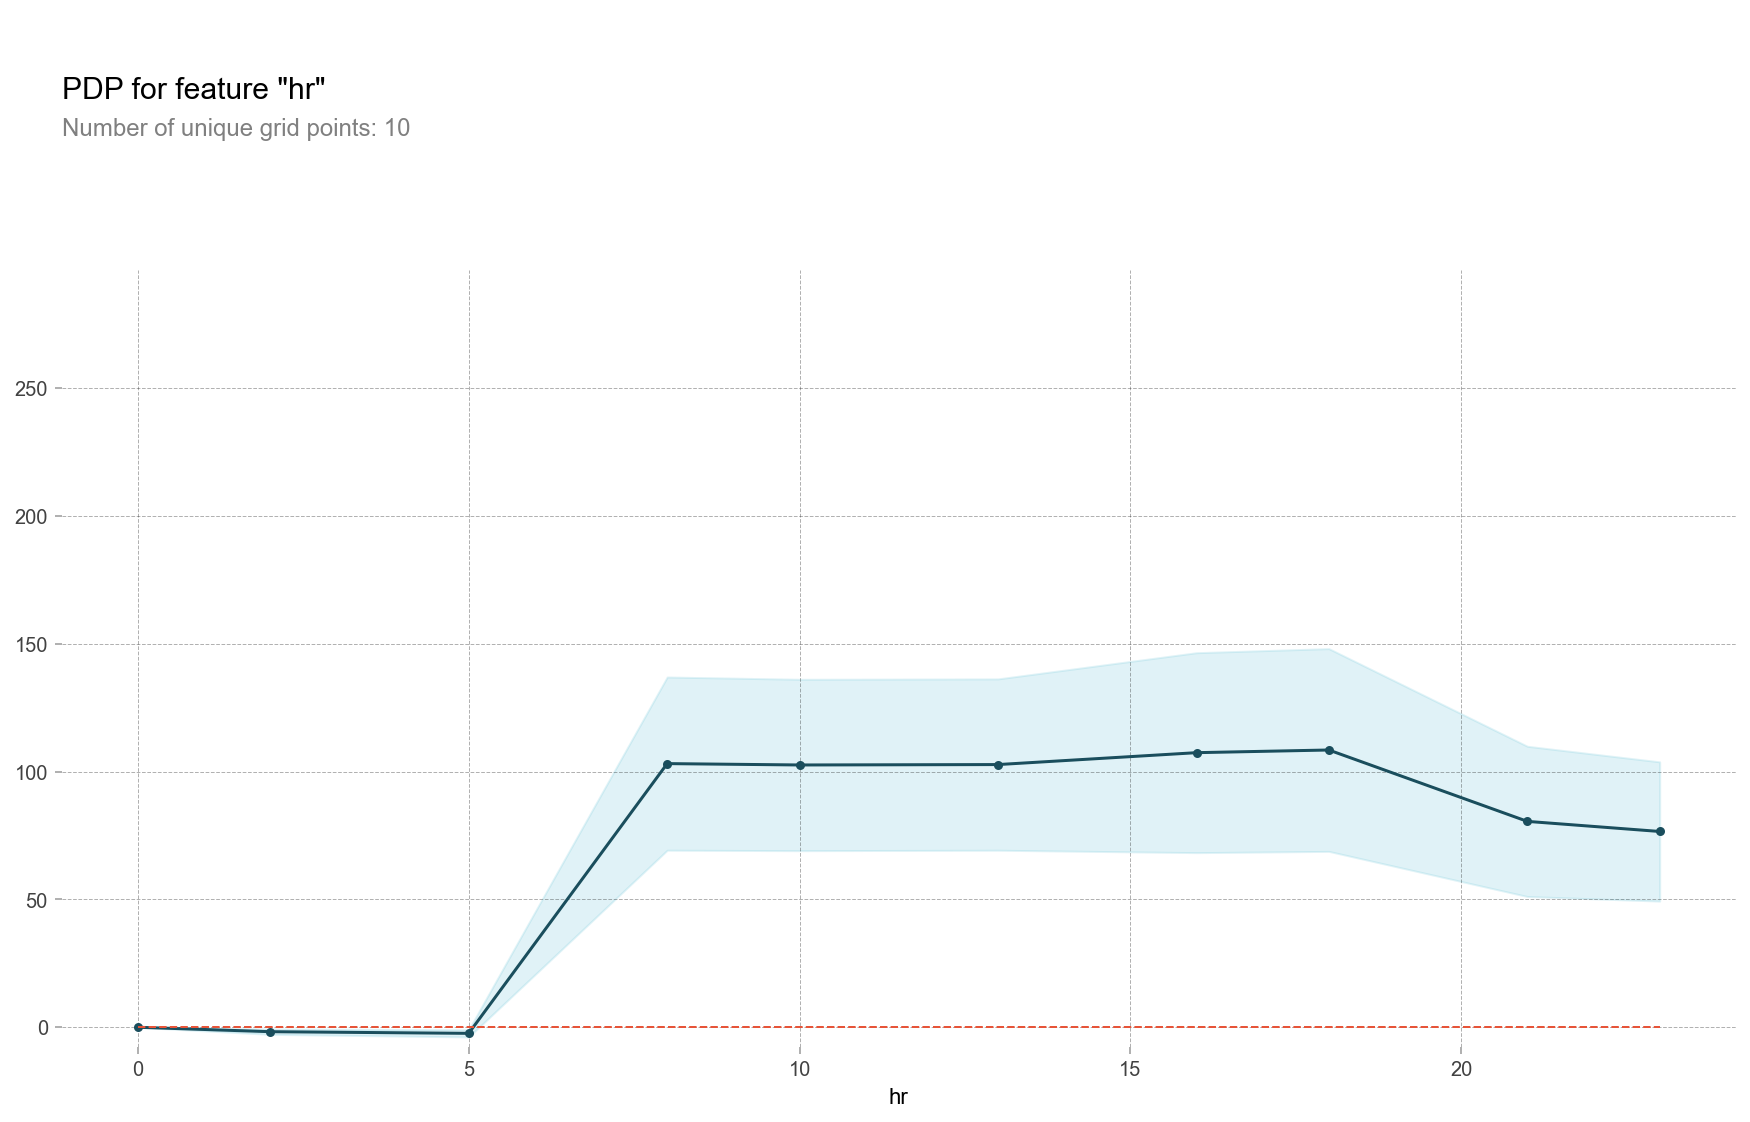

In [54]:
isolated = pdp_isolate(
    model=best_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature='hr',
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name='hr');

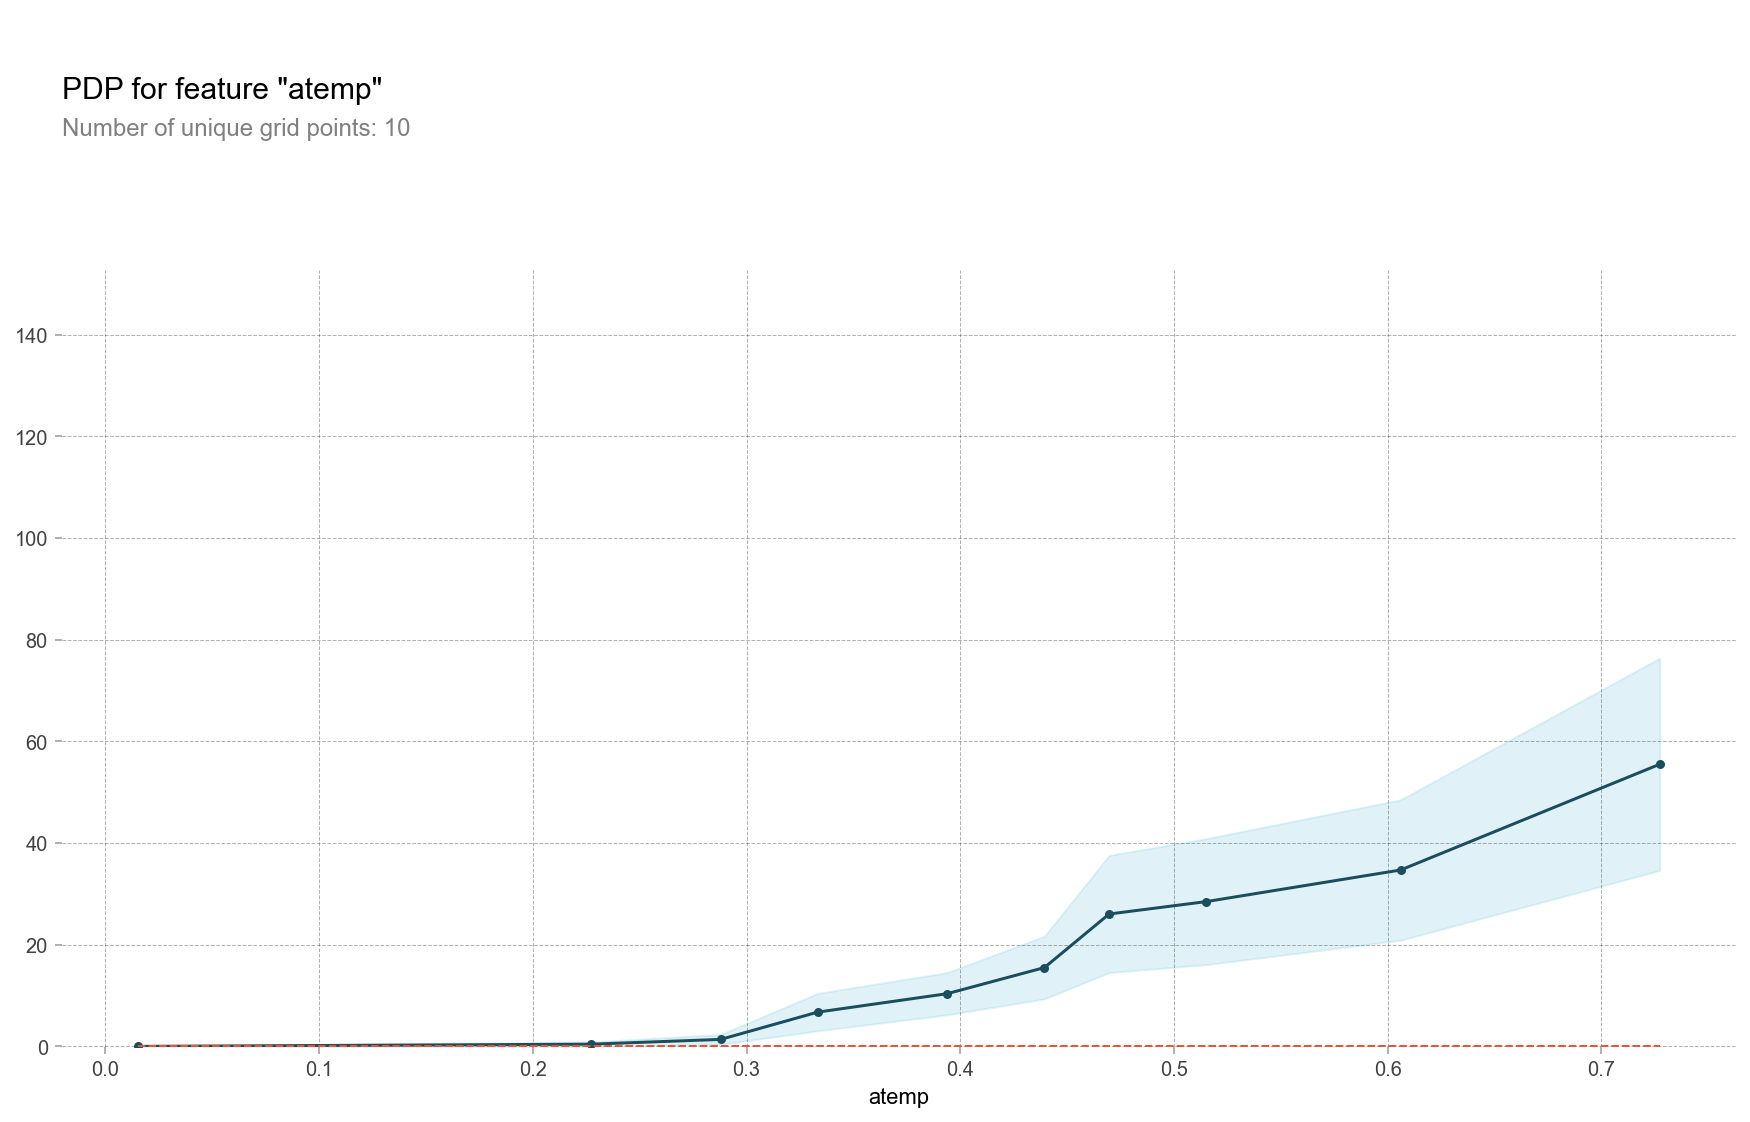

In [56]:
isolated = pdp_isolate(
    model=best_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature='atemp',
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name='atemp');

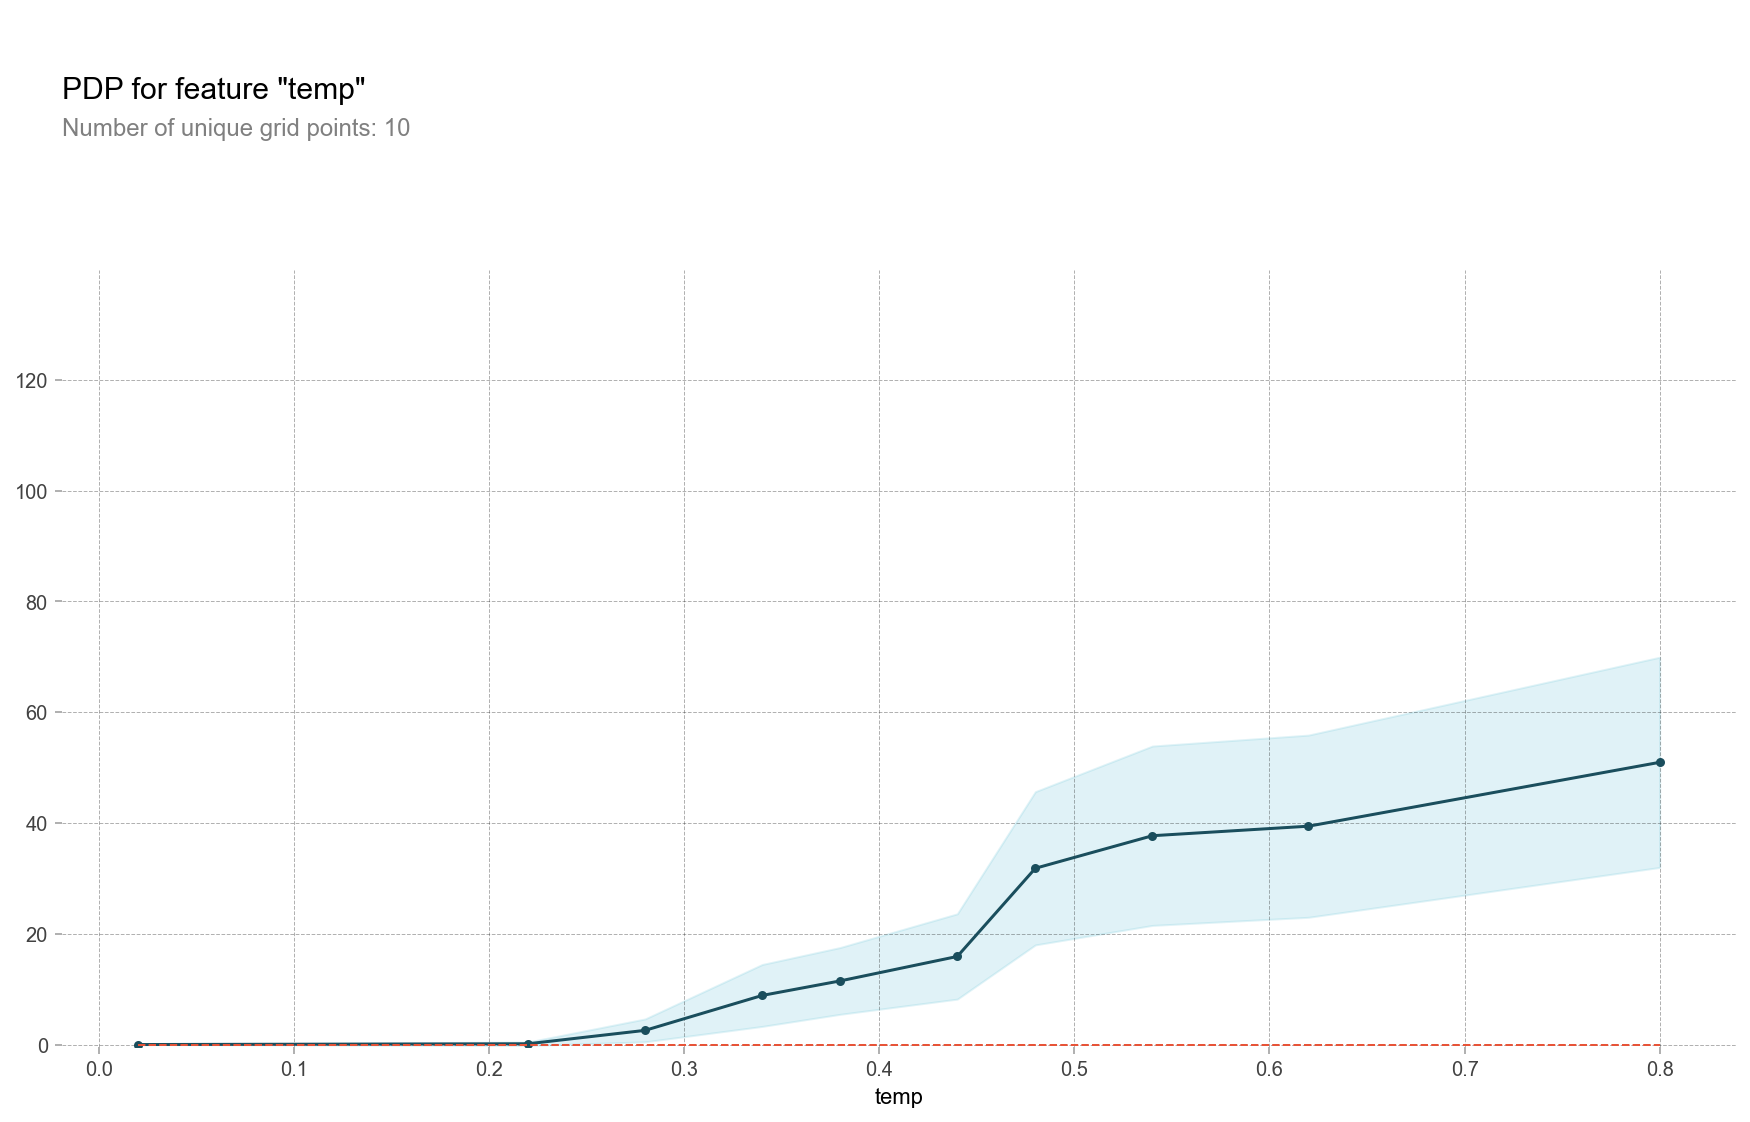

In [67]:
isolated = pdp_isolate(
    model=best_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature='temp',
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name='temp');

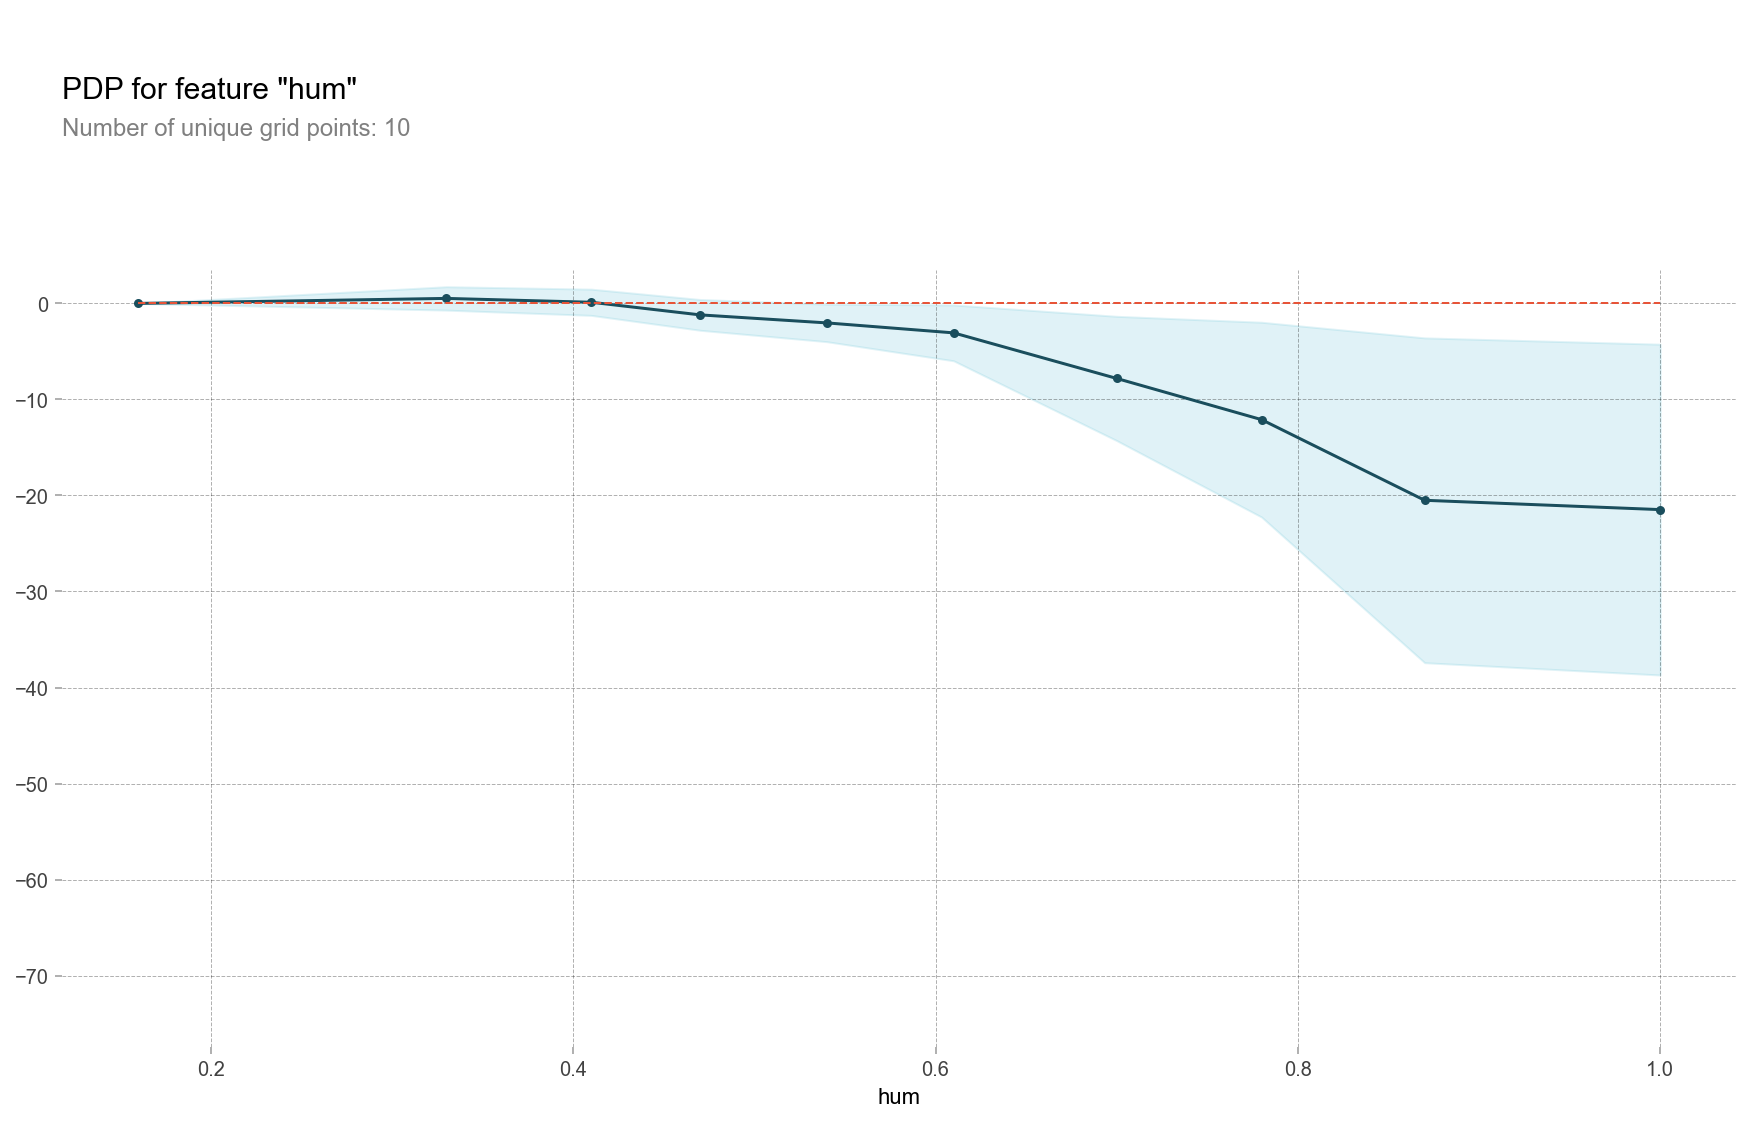

In [57]:
isolated = pdp_isolate(
    model=best_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature='hum',
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name='hum');

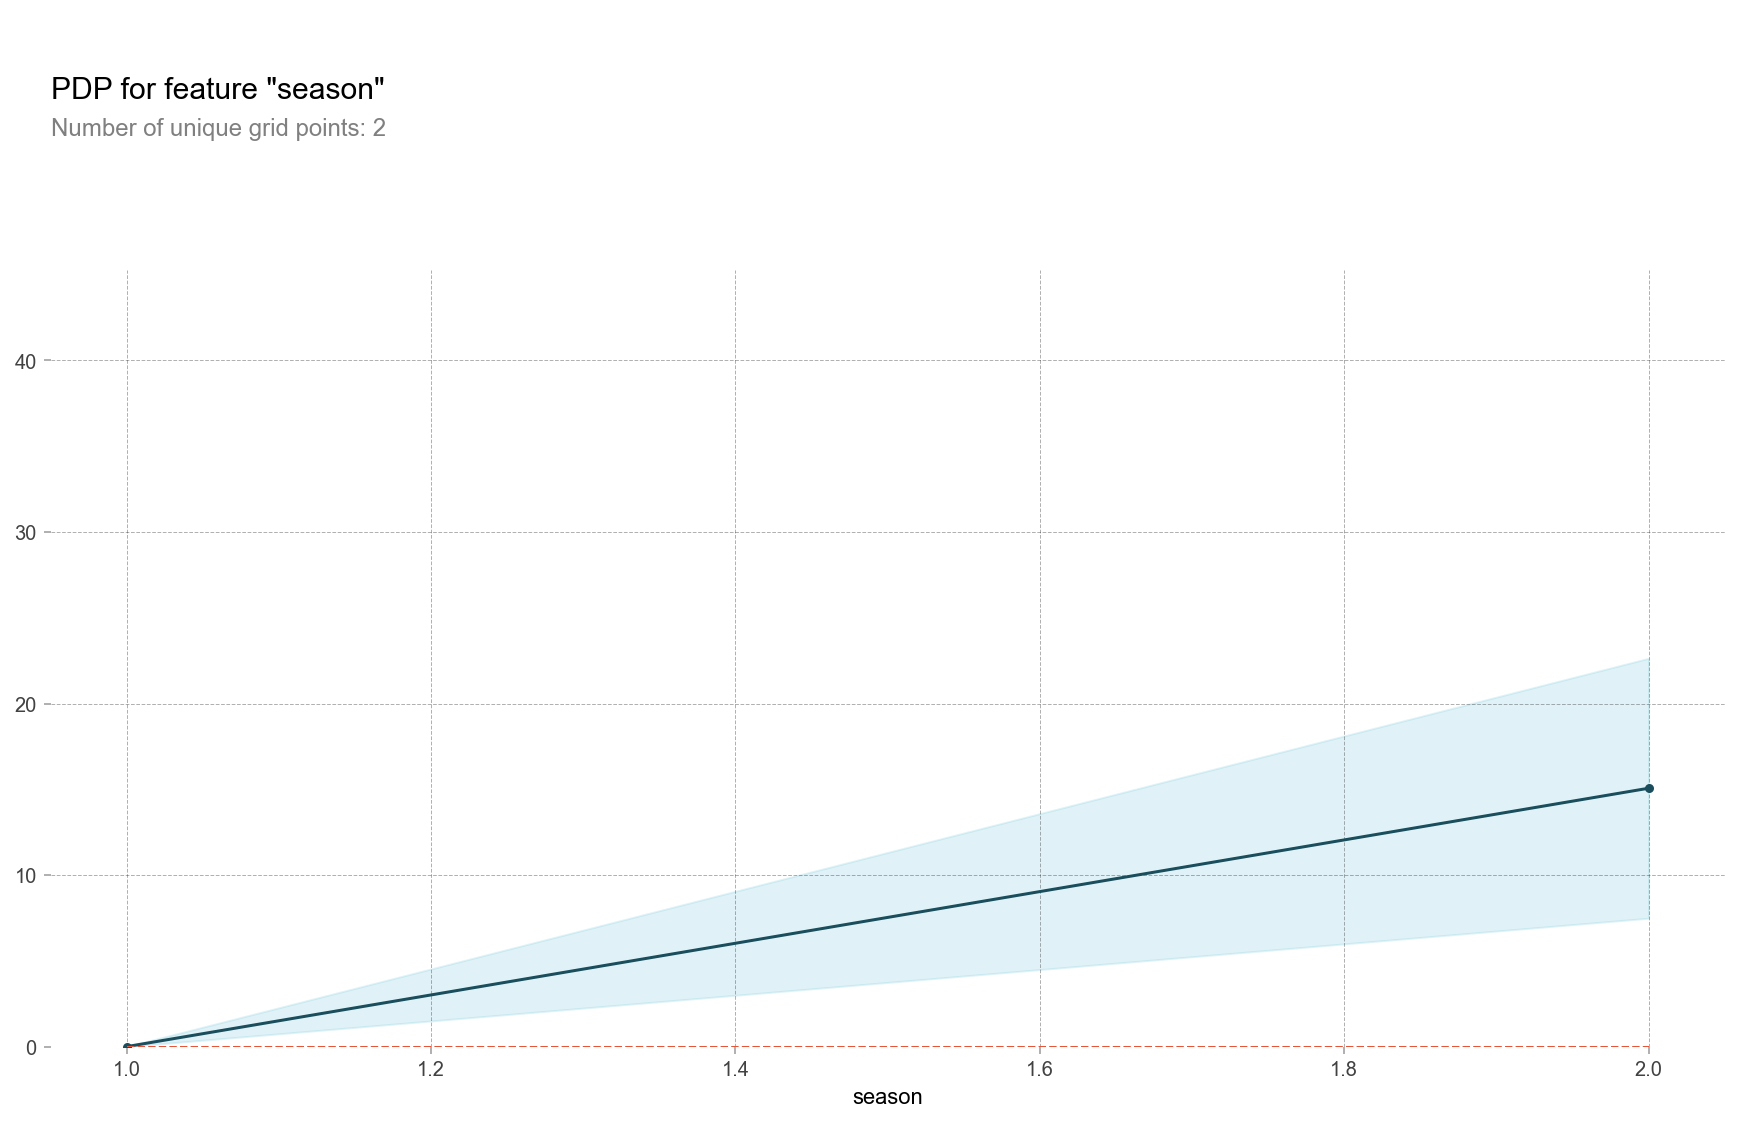

In [58]:
isolated = pdp_isolate(
    model=best_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature='season',
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name='season');

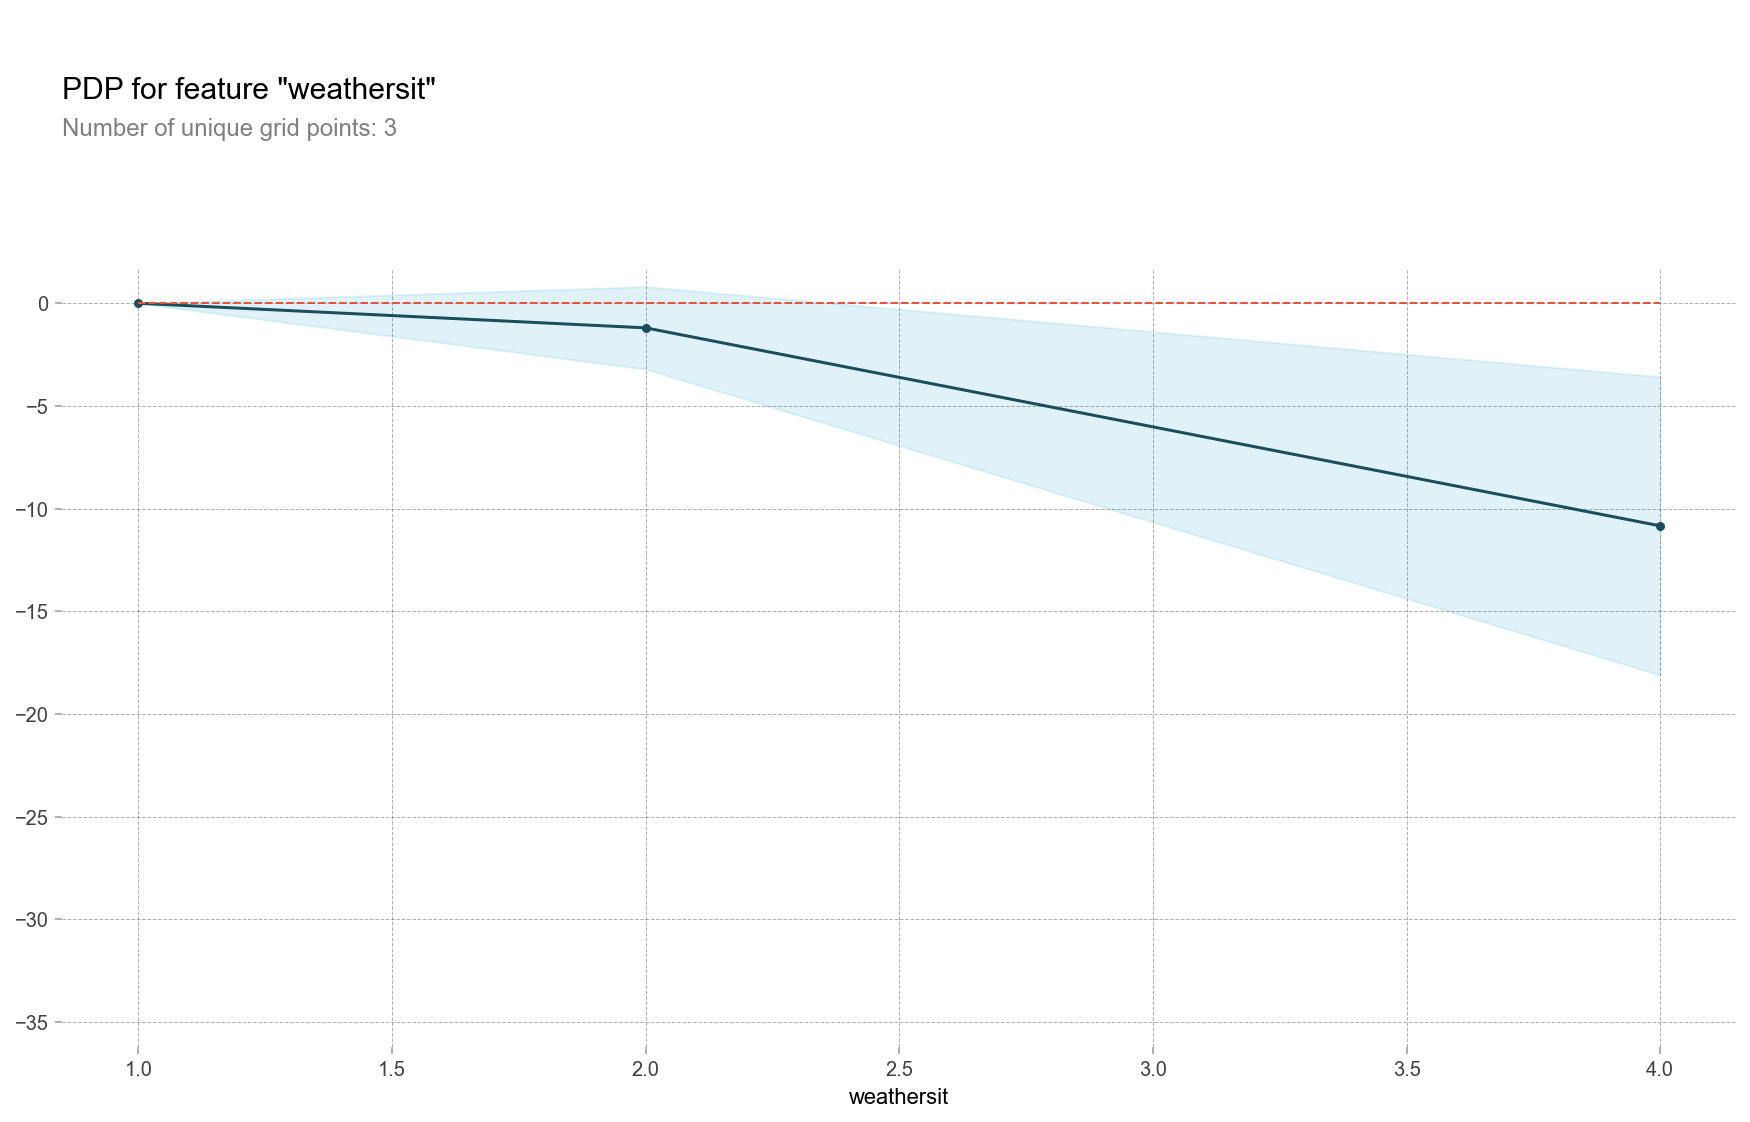

In [59]:
isolated = pdp_isolate(
    model=best_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature='weathersit',
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name='weathersit');

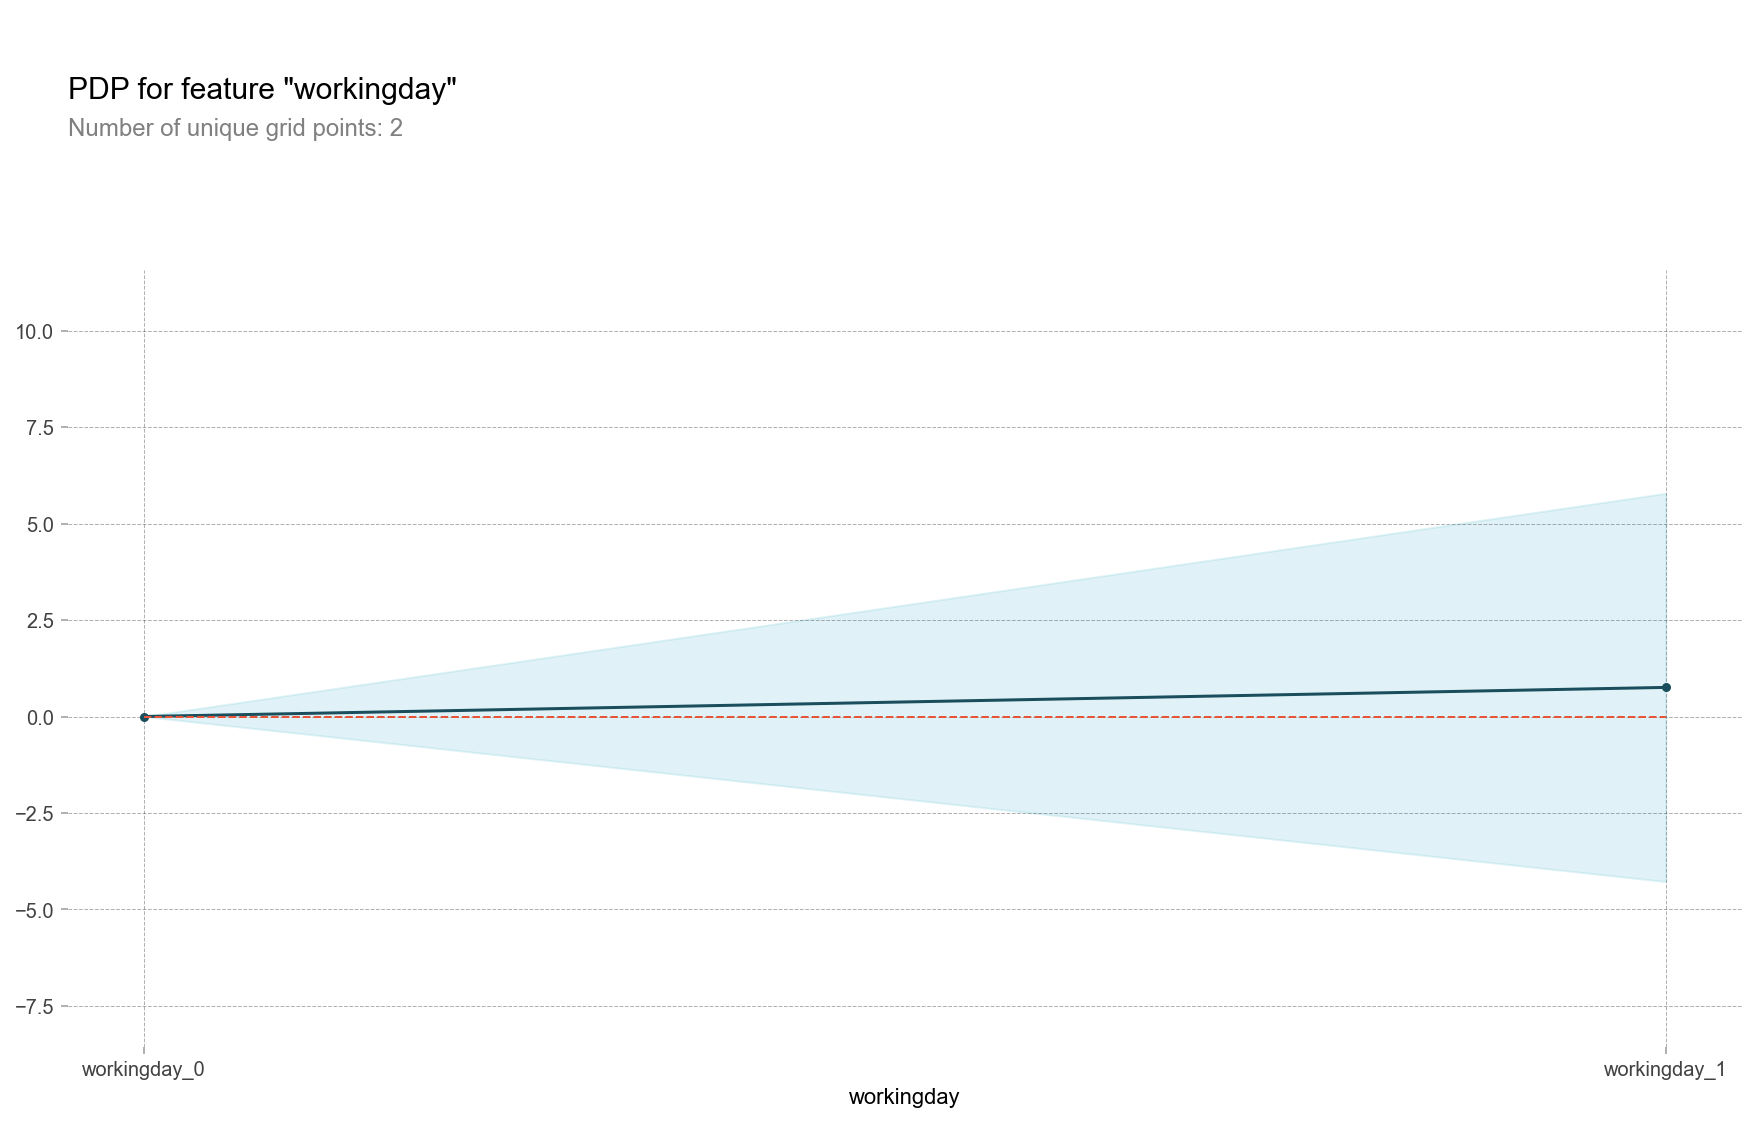

In [60]:
isolated = pdp_isolate(
    model=best_model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature='workingday',
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name='workingday');

In [72]:
import shap

explainer = shap.Explainer(best_model)
shap_values = explainer(X_train)

shap.initjs()

In [80]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

In [73]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [75]:
# visualize all the training set predictions
shap.plots.force(shap_values)

Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

In [77]:
shap.force_plot(explainer.expected_value[0], shap_values[0])

AssertionError: visualize() can only display Explanation objects (or arrays of them)!

In [76]:
shap.force_plot(explainer.expected_value, shap_values)

AssertionError: visualize() can only display Explanation objects (or arrays of them)!

In [63]:
shap.plots.scatter(shap_values[:,"hr"], color=shap_values)

IndexError: index 0 is out of bounds for axis 0 with size 0

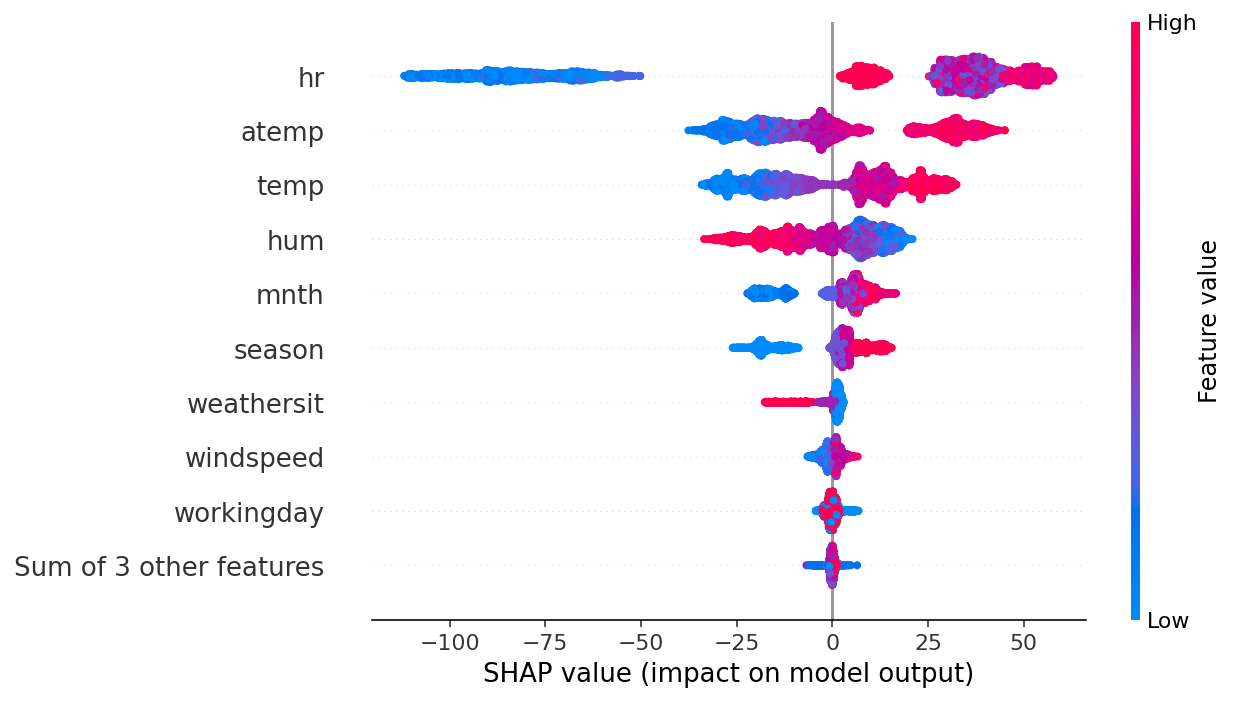

In [66]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

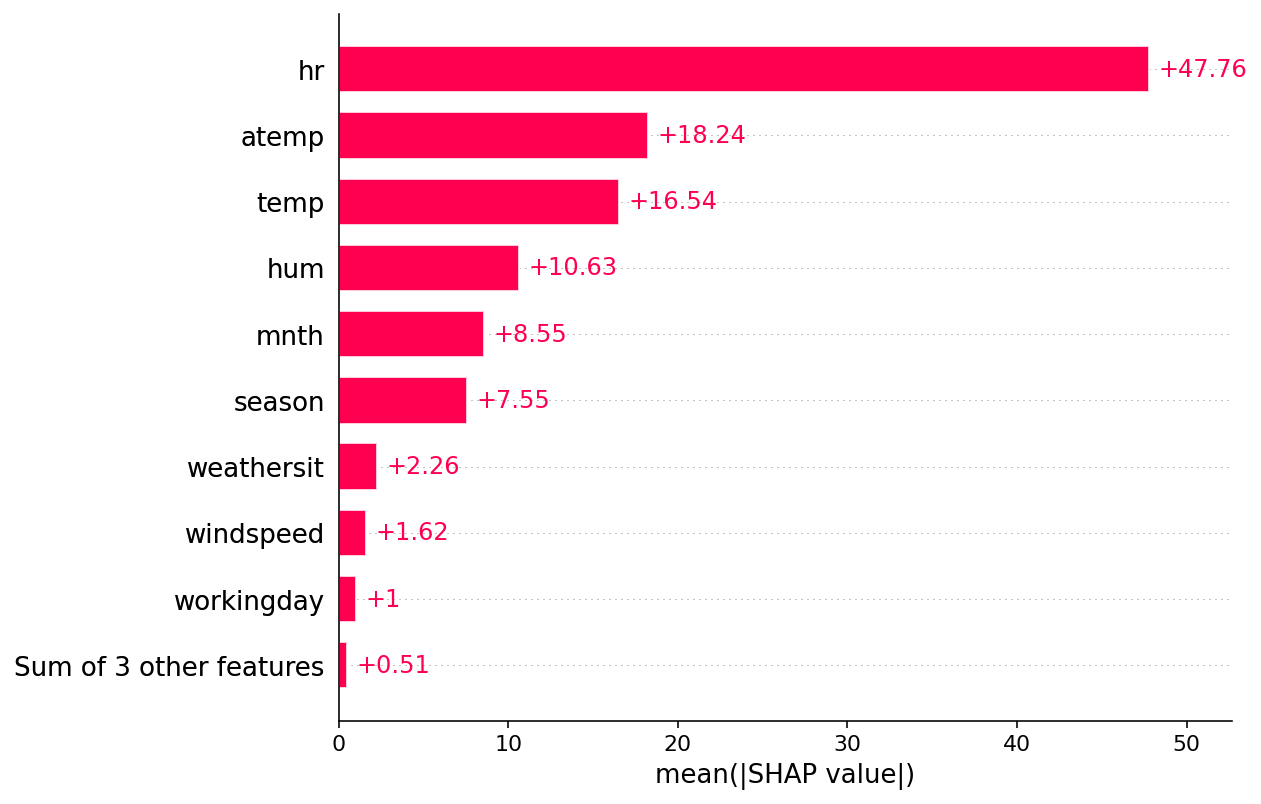

In [65]:
shap.plots.bar(shap_values)